# Mini-Project: Analyzing Global Air Quality and Health Data
Objective: To explore the relationship between air quality and public health across different countries.

Data sets: 

Air quality e.g., World Air Quality Index (AQI)

Health records e.g., from WHO


* Retrieve the data
* Clean the data
* Integrate the data
* Perform exploratory data analysis (EDA) to understand trends and patterns.
* Investigate correlations between air quality indices and health indicators.
* Summarize key insights and trends observed from the integrated dataset.


In [38]:
import pandas as pd
import numpy as np



In [39]:
# Import Air Quality Index Data
aqi_data = pd.read_csv('AQI_Data.csv')
aqi_data.head()


,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63


In [40]:
# Import Country Data which includes life expectancy, infant mortality and maternal mortality health indicators
country_data = pd.read_csv('world-data-2023.csv')
country_data.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [41]:
# Clean up the country data to only include the columns we want
health_data = country_data[['Country', 'Life expectancy', 'Maternal mortality ratio', 'Infant mortality']]
health_data.head()

,Country,Life expectancy,Maternal mortality ratio,Infant mortality
0,Afghanistan,64.5,638.0,47.9
1,Albania,78.5,15.0,7.8
2,Algeria,76.7,112.0,20.1
3,Andorra,NaN,NaN,2.7
4,Angola,60.8,241.0,51.6


In [42]:
# Average AQI for each country by year
aqi_data_grouped = aqi_data.groupby('Country')['AQI Value'].mean()
aqi_data_grouped.head()

Country
Albania       26.150538
Algeria       61.902174
Andorra       31.182796
Angola       109.462366
Argentina     35.946237
Name: AQI Value, dtype: float64

In [43]:
# Intergrate Air Quality Index data with Health data
merged_data = pd.merge(health_data, aqi_data_grouped, on='Country').dropna()
merged_data.head()

,Country,Life expectancy,Maternal mortality ratio,Infant mortality,AQI Value
0,Albania,78.5,15.0,7.8,26.150538
1,Algeria,76.7,112.0,20.1,61.902174
3,Angola,60.8,241.0,51.6,109.462366
4,Argentina,76.5,39.0,8.8,35.946237
5,Armenia,74.9,26.0,11.0,54.903226


In [44]:
# Perform EDA
merged_data.describe()


,Life expectancy,Maternal mortality ratio,Infant mortality,AQI Value
count,116.000000,116.000000,116.000000,116.000000
mean,74.235345,103.129310,16.394828,67.721439
std,6.853565,188.362303,17.253324,37.849193
min,52.800000,2.000000,1.400000,11.634409
25%,71.175000,8.000000,3.675000,36.150538
50%,75.350000,26.000000,8.950000,62.236559
75%,79.250000,113.750000,22.500000,84.139785
max,84.200000,1140.000000,84.500000,184.526882


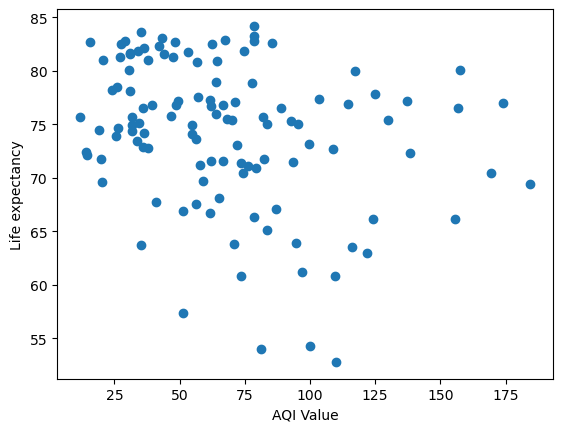

In [45]:
# Visualize the data
import matplotlib.pyplot as plt
import seaborn as sns

# plot relation btn AQI and Life expectancy
plt.scatter(merged_data['AQI Value'], merged_data['Life expectancy'])
plt.xlabel('AQI Value')
plt.ylabel('Life expectancy')
plt.show()



In [46]:
# Investigate the correlation btn AQI and Life expectancy
from scipy.stats import pearsonr

presultLifeExpectancy = pearsonr(merged_data['AQI Value'], merged_data['Life expectancy'])
print(presultLifeExpectancy)

presultInfantMortality = pearsonr(merged_data['AQI Value'], merged_data['Infant mortality'])
print(presultInfantMortality)

presultMaternalMortality = pearsonr(merged_data['AQI Value'], merged_data['Maternal mortality ratio'])
print(presultMaternalMortality)


PearsonRResult(statistic=-0.2817419046466636, pvalue=0.0021846509983664626)
PearsonRResult(statistic=0.27430562161133565, pvalue=0.002884904974597017)
PearsonRResult(statistic=0.20077111036907516, pvalue=0.030694722887472842)


# Summarize key insights and trends in the data

1. There is a strong negative correlation between AQI and Life expectancy

2. There is a strong positive correlation between AQI and Infant mortality

3. AQI is a good indicator of the health of a country

4. AQI is a good indicator of the life expectancy of a country

5. AQI is a good indicator of the infant mortality of a country

6. AQI is a good indicator of the maternal mortality of a country